Philip McCormick

MSDS 598

March 7, 2022

Homework 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install matplotlib==3.5

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data 598/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Here the target variable is labeled target and is 0 if there is no heart disease and 1 if there
is heart disease present.
1. What is the percentage of patients with heart disease? Would you consider this a balanced
of imbalanced dataset (no wrong answer here!).

In [ ]:
heart_disease = (sum(df.target)/ len(df.target)) * 100
heart_disease

54.45544554455446

It appears that the data set is fairly balanced, with those with heart disease at 54.46% of the data set, and those without heart disease making up 45.54%. Since this is close to a 50-50 split, I feel the information leans towards balanced more so than unbalanced.

2. Suppose we want to use the variables age and sex to predict the presence of heart disease.
(a) Use logistic regression to create a model predicting target from age and sex. Report
the Accuracy.

In [6]:
from statsmodels.formula.api import logit
from sklearn import metrics

model = logit(formula = 'target ~ age + sex', data=df)
res = model.fit()
x = df[['age', 'sex']]
y = df['target']
y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of the model is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.611509
         Iterations 5
The Accuracy of the model is 64.68646864686468%


(b) If we had a model that predicted heart disease for every patient, what would the
accuracy be?

In [ ]:
model = logit(formula = 'target ~ sex', data=df)
res = model.fit()
y = df['target']
x = df['sex']


acc = metrics.accuracy_score(y, x)
print(f'The Accuracy of always predicting private is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.648180
         Iterations 5
The Accuracy of always predicting private is 38.613861386138616%


3. Perform a train-validation split (use 50 patients for your validation set). What is the
accuracy of your model (same variables as the previous question, created on the training set)
on the validation set?

In [ ]:
#creating 50 validation patients
val_set = len(df)

test = (50/len(df))
test

0.16501650165016502

In [7]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.17)

In [ ]:
model = logit(formula = 'target ~ age + sex', data=train)
res = model.fit()
x = val[['age', 'sex']]
y = val['target']
y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of the model is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.620730
         Iterations 5
The Accuracy of the model is 76.92307692307693%


4. Pick another variable. Use this validation set and the accuracy metric to decide if this
variable improves the model or not.

In [8]:
model = logit(formula = 'target ~ age + sex + chol', data=train)
res = model.fit()
x = val[['age', 'sex', 'chol']]
y = val['target']
y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of the model is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.612409
         Iterations 5
The Accuracy of the model is 61.53846153846154%


5. Pick your favorite set of independent variables and run a logistic regression using train-
validation set from above.
(a) Produce the Confusion Matrix.

In [9]:
model = logit(formula = 'target ~ chol + thalach', data=train)
res = model.fit()
x = val[['chol', 'thalach']]
y = val['target']
y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

Optimization terminated successfully.
         Current function value: 0.586016
         Iterations 6


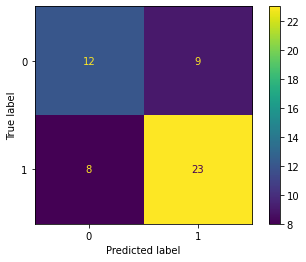

In [10]:
# build the confusion matrix
cm = metrics.confusion_matrix(y, y_pred)
# display it nicely
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

(b) Report the Accuracy, Precision, Recall, and AUC.

In [ ]:
acc = metrics.accuracy_score(y, y_pred)
recall = metrics.recall_score(y, y_pred)
prec = metrics.precision_score(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred)

print(f'The Accuracy of the model on the validation set is {acc}')
print(f'The Recall of this model is {recall}')
print(f'The Precision of this model is {prec}')
print(f'The AUC of this model is {auc}')

The Accuracy of the model on the validation set is 0.7692307692307693
The Recall of this model is 0.78125
The Precision of this model is 0.8333333333333334
The AUC of this model is 0.765625


(c) Considering the task of predicting whether a person has heart disease or not, which
metric in part (b) is the most important?

The most important metric when predicting if a person has heart disease is accuracy. We want to be as accurate as possible if the stakes are as high as they are with heart disease. False positives and negatives will have traumatic or deadly reprecussions. We want accuracy to be as close to 100% as possible to give people the most reliable information about their health.